In [1]:
# 데이터 분석 패키지
import pandas as pd

# 행렬 연산 패키지
import numpy as np

# 데이터 시각화 패키지
import matplotlib
import matplotlib.pyplot as plt

#데이터 시각화(추세 등) 패키지
import seaborn as sns

# 가설검정 및 통계분석 패키지
from scipy import stats

# 회귀분석
from statsmodels.formula.api import ols

# ANOVA 분석 패키지
from statsmodels.stats.anova import anova_lm

# qqplot, 회귀분석의 상수항 추가
from statsmodels.api import qqplot, add_constant

# 선형모델 formula
import statsmodels.formula.api as smf

# 평가함수
from statsmodels.tools.eval_measures import rmse

# 다중공선성 확인
from statsmodels.stats.outliers_influence import variance_inflation_factor

# 학습용/평가용 데이터 분리 : train test
from sklearn.model_selection import train_test_split

# 선형 회귀 모형
from sklearn.linear_model import LinearRegression

# 변수 선택법(후진제거법)
from sklearn.feature_selection import RFE

#Scale 변환 -> 표준화 회귀계수 산출
from sklearn.preprocessing import StandardScaler

# 평가함수
from statsmodels.tools.eval_measures import rmse
from sklearn.metrics import r2_score

# 최적 모델, 파라미터 탐색
from sklearn.model_selection import GridSearchCV

# 예측/회귀
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier


# export_graphviz : 나무 구조 생성 및 저장
from sklearn.tree import export_graphviz

# graphiz : 나무 구조 시각화 (.dot 확장자 파일 불러오기 등)
import graphviz

from sklearn.ensemble import RandomForestRegressor as RFR
from sklearn.ensemble import GradientBoostingRegressor as GBR

# 로지스틱 회귀
from statsmodels.api import Logit

# 분류모델 평가 함수
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report

#평가함수
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

# SMOTE
from imblearn.over_sampling import SMOTE

# 분류 NN (MLPClassifier)
from sklearn.neural_network import MLPClassifier

# 한글 폰트 적용
matplotlib.rcParams['font.family'] ='Malgun Gothic'
matplotlib.rcParams['axes.unicode_minus'] =False

In [2]:
df_raw = pd.read_csv("D:/data/2/통신고객이탈.csv",encoding='euc-kr')
df_raw

,CHURN,CUSTOMER_ID,GENDER,AGE,CHARGE_TYPE,HANDSET,USAGE_BAND,SERVICE_DURATION,DROPPED_CALLS,PEAK_CALLS_NO,PEAK_CALLS_TIME,WEEKEND_CALLS_NO,WEEKEND_CALLS_TIME,TOTAL_CALLS_NO,TOTAL_CALLS_TIME
0,Active,K102990,F,31,CAT 100,ASAD170,Med,33.33,6,218,379.8,9,21.6,366,632.4
1,Active,K103280,M,27,CAT 100,S50,Med,30.87,10,373,656.4,11,28.0,411,810.4
2,Active,K103660,M,27,CAT 100,ASAD170,Med,49.40,11,260,582.0,0,0.0,265,614.1
3,Active,K103730,M,61,CAT 100,ASAD170,Med,48.60,1,294,661.8,14,101.5,326,844.0
4,Active,K104560,F,52,CAT 100,S50,Med,56.03,0,221,555.6,7,25.0,274,673.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
925,Churned,K413330,M,19,Play 100,SOP10,Med,17.40,12,60,100.8,27,59.4,127,628.2
926,Churned,K413410,F,59,Play 100,SOP20,Med,17.37,15,82,130.2,12,25.8,357,650.7
927,Churned,K415490,F,33,Play 300,S50,Med,44.93,12,174,286.2,25,67.0,596,1039.0
928,Churned,K415880,F,25,Play 300,S50,Med,40.43,14,315,552.0,0,0.0,609,1188.3


In [3]:
df_raw.isnull().sum()

CHURN                 0
CUSTOMER_ID           0
GENDER                0
AGE                   0
CHARGE_TYPE           0
HANDSET               0
USAGE_BAND            0
SERVICE_DURATION      0
DROPPED_CALLS         0
PEAK_CALLS_NO         0
PEAK_CALLS_TIME       0
WEEKEND_CALLS_NO      0
WEEKEND_CALLS_TIME    0
TOTAL_CALLS_NO        0
TOTAL_CALLS_TIME      0
dtype: int64

In [4]:
# 데이터 구성하기 - 더미변수 생성
df_dummy = pd.get_dummies(df_raw)
df_dummy.head()

,AGE,SERVICE_DURATION,DROPPED_CALLS,PEAK_CALLS_NO,PEAK_CALLS_TIME,WEEKEND_CALLS_NO,WEEKEND_CALLS_TIME,TOTAL_CALLS_NO,TOTAL_CALLS_TIME,CHURN_Active,...,HANDSET_S80,HANDSET_SOP10,HANDSET_SOP20,HANDSET_WC95,USAGE_BAND_High,USAGE_BAND_Low,USAGE_BAND_Med,USAGE_BAND_MedHigh,USAGE_BAND_MedLow,USAGE_BAND_None
0,31,33.33,6,218,379.8,9,21.6,366,632.4,1,...,0,0,0,0,0,0,1,0,0,0
1,27,30.87,10,373,656.4,11,28.0,411,810.4,1,...,0,0,0,0,0,0,1,0,0,0
2,27,49.40,11,260,582.0,0,0.0,265,614.1,1,...,0,0,0,0,0,0,1,0,0,0
3,61,48.60,1,294,661.8,14,101.5,326,844.0,1,...,0,0,0,0,0,0,1,0,0,0
4,52,56.03,0,221,555.6,7,25.0,274,673.0,1,...,0,0,0,0,0,0,1,0,0,0


In [5]:
# 데이터 구성하기 - 데이터 분할
df_raw_x = df_dummy.drop('CHURN_Active',axis=1, inplace=False)
df_raw_y = df_dummy['CHURN_Active']
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_raw_x, df_raw_y, test_size = 0.3, random_state=1234)

print(df_train_x.shape)
print(df_train_y.shape)
print(df_test_x.shape)
print(df_test_y.shape)

(651, 964)
(651,)
(279, 964)
(279,)


In [6]:
# MLPClassfier 모델 생성 
# - 기본 옵션으로 모델 생성

nn_uncustomized = MLPClassifier(random_state = 1234)
# hidden_layer_sizes = (100,100) 변경 (은닉층 2개, 각 은닉층 노드 100개)
nn_uncustomized.fit(df_train_x, df_train_y)
# train 데이터 셋 정확도
print("Accuracy on training set: {:.3f}".format(nn_uncustomized.score(df_train_x, df_train_y)))
# test 데이터 셋 정확도
print("Accuracy on test set: {:.3f}".format(nn_uncustomized.score(df_test_x, df_test_y)))

Accuracy on training set: 1.000
Accuracy on test set: 0.943


c:\dev\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [7]:
# - 현재 생성된 SVC모델의 옵션 확인
nn_uncustomized

MLPClassifier(random_state=1234)

In [8]:
# test 및 정확도 결과 저장용
train_accuracy = []
test_accuracy = []

# hidden_layer_sizes: 은닉층 변경(20, 40, 60, 80, 100, 120, 140, 160)
para_hidden = [20*hidden for hidden in range(1,9)]

for v_hidden in para_hidden:
    nn = MLPClassifier(hidden_layer_sizes=v_hidden, random_state=1234) # 1D (20,), (40,)...
    # nn = MLPClassifier(hidden_layer_sizes=(v_hidden, v_hidden), random_state=1234) # 2D (20,20), (40,40)...
    nn.fit(df_train_x, df_train_y)
    train_accuracy.append(nn.score(df_train_x,df_train_y))
    test_accuracy.append(nn.score(df_test_x,df_test_y))
# 데이터 테이블로 저장
df_accuracy_hidden = pd.DataFrame()
df_accuracy_hidden['n_estimators'] = para_hidden
df_accuracy_hidden['TrainScore'] = train_accuracy
df_accuracy_hidden['TestScore'] = test_accuracy
# 은닉층별 정확도 테이블
df_accuracy_hidden.round(3)

c:\dev\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\dev\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\dev\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\dev\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


,n_estimators,TrainScore,TestScore
0,20,0.998,0.964
1,40,0.968,0.932
2,60,0.983,0.932
3,80,1.000,0.950
4,100,1.000,0.943
5,120,0.983,0.928
6,140,0.828,0.857
7,160,0.879,0.875


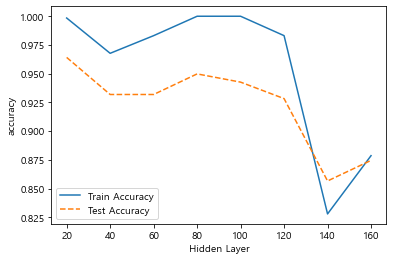

In [9]:
# 모델 정확도별 그래프 확인
plt.plot(para_hidden, train_accuracy, linestyle='-', label='Train Accuracy')
plt.plot(para_hidden, test_accuracy, linestyle='--', label='Test Accuracy')
plt.ylabel('accuracy')
plt.xlabel('Hidden Layer')
plt.legend();

In [10]:
# test 및 정확도 결과 저장용
train_accuracy = []
test_accuracy = []

# activation 변경
para_function = ['logistic', 'tanh', 'relu']

for v_function in para_function:
    nn = MLPClassifier(activation=v_function, random_state=1234) 
    nn.fit(df_train_x, df_train_y)
    train_accuracy.append(nn.score(df_train_x,df_train_y))
    test_accuracy.append(nn.score(df_test_x,df_test_y))
# 데이터 테이블로 저장
df_accuracy_function = pd.DataFrame()
df_accuracy_function['n_estimators'] = para_function
df_accuracy_function['TrainScore'] = train_accuracy
df_accuracy_function['TestScore'] = test_accuracy
# Activation별 정확도 테이블
df_accuracy_function.round(3)

c:\dev\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\dev\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


,n_estimators,TrainScore,TestScore
0,logistic,0.994,0.961
1,tanh,0.825,0.839
2,relu,1.000,0.943


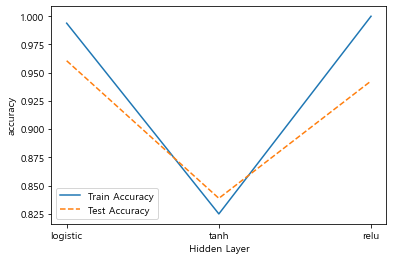

In [11]:
# 모델 정확도별 그래프 확인
plt.plot(para_function, train_accuracy, linestyle='-', label='Train Accuracy')
plt.plot(para_function, test_accuracy, linestyle='--', label='Test Accuracy')
plt.ylabel('accuracy')
plt.xlabel('Hidden Layer')
plt.legend();

In [12]:
#변수명 저장
v_feature_name = df_train_x.columns
#StandardScaler 적용
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_raw_x)
df_scaled = pd.DataFrame(df_scaled, columns=v_feature_name)
df_scaled.head()

#데이터 분할
df_scaled_train_x, df_scaled_test_x = train_test_split(df_scaled ,test_size = 0.3, random_state = 1234)
print("train data X size : {}".format(df_scaled_train_x.shape))
print("tets data X size : {}".format(df_scaled_train_x.shape))

train data X size : (651, 964)
tets data X size : (651, 964)


In [13]:
nn_scaled = MLPClassifier(random_state=1234)
nn_scaled.fit(df_scaled_train_x, df_train_y)
# train 데이터 셋 정확도
print("Accuracy on training set: {:.3f}".format(nn_scaled.score(df_scaled_train_x, df_train_y)))
# test 데이터 셋 정확도
print("Accuracy on test set: {:.3f}".format(nn_scaled.score(df_scaled_test_x, df_test_y)))

Accuracy on training set: 1.000
Accuracy on test set: 0.405


In [14]:
#train 및 test 정확도 결과 저장용
train_accuracy = []; test_accuracy=[]
#hidden_layer_sizes : 은닉층 변경 (20~240, by 30)
para_hidden = [20*hidden for hidden in range(1, 11)]

for v_hidden in para_hidden:
# nn = MLPClassifier(hidden_layer_sizes = v_hidden, random_state = 1234)
  nn = MLPClassifier(hidden_layer_sizes = (v_hidden, v_hidden), random_state = 1234)
  nn.fit(df_scaled_train_x, df_train_y)
  train_accuracy.append(nn.score(df_scaled_train_x, df_train_y))
  test_accuracy.append(nn.score(df_scaled_test_x, df_test_y))

#데이터 테이블로 저장
df_accuracy_hidden = pd.DataFrame()
df_accuracy_hidden["HiddenLayer"] = para_hidden
df_accuracy_hidden["TrainAccuracy"] = train_accuracy
df_accuracy_hidden["TestAccuracy"] = test_accuracy

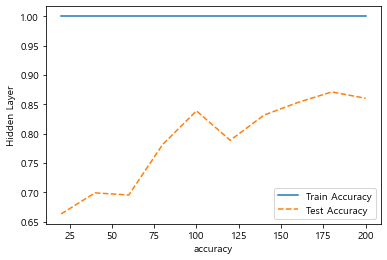

In [15]:
#은닉층별 정확도 테이블
df_accuracy_hidden.round(3)
#모델 정확도 그래프 확인
plt.plot(para_hidden, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_hidden, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.xlabel("accuracy");plt.ylabel("Hidden Layer")
plt.legend()

In [16]:
#은닉층 지정(임의)
hidden_layer_sizes = 80

In [17]:
# Train 및 Test 정확도 결과 저장용
train_accuracy = []; test_accuracy = []
# activation 변경
para_function = ['logistic', 'tanh', 'relu']

for v_function in para_function:
    nn = MLPClassifier(activation = v_function, hidden_layer_sizes = (80, 80), random_state = 1234)
    nn.fit(df_scaled_train_x, df_train_y)
    train_accuracy.append(nn.score(df_scaled_train_x, df_train_y))
    test_accuracy.append(nn.score(df_scaled_test_x, df_test_y))
    
# 데이터 테이블로 저장
df_accuracy_function = pd.DataFrame()
df_accuracy_function['ActivationFunction'] = para_function
df_accuracy_function['TrainAccuracy'] = train_accuracy
df_accuracy_function['TestAccuracy'] = test_accuracy

In [18]:
# Activation Function별 정확도 테이블
df_accuracy_function.round(3)

,ActivationFunction,TrainAccuracy,TestAccuracy
0,logistic,1.0,0.620
1,tanh,1.0,0.197
2,relu,1.0,0.781


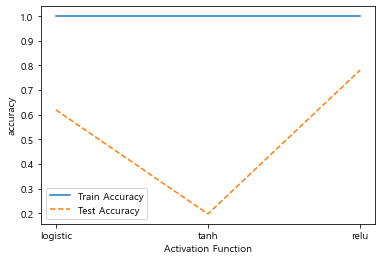

In [19]:
# Activation Function별 정확도 그래프로 확인
plt.plot(para_function, train_accuracy, linestyle='-', label = 'Train Accuracy')
plt.plot(para_function, test_accuracy, linestyle='--', label = 'Test Accuracy')
plt.ylabel('accuracy') ; plt.xlabel('Activation Function')
plt.legend()

In [20]:
# Activation Function 지정(임의)
activation = 'relu'

In [21]:
# train 및 test 정확도 결과 저장용
train_accuracy = [] ; test_accuracy = []
# solver 변경
para_solver = ['lbfgs', 'sgd', 'adam']

for v_solver in para_solver:
    nn=MLPClassifier(solver=v_solver, activation = 'relu', hidden_layer_sizes = (80, 80), random_state = 1234)
    nn.fit(df_scaled_train_x, df_train_y)
    train_accuracy.append(nn.score(df_scaled_train_x, df_train_y))
    test_accuracy.append(nn.score(df_scaled_test_x, df_test_y))
    
# 데이터 테이블로 저장
df_accuracy_solver = pd.DataFrame()
df_accuracy_solver['Solver'] = para_solver
df_accuracy_solver['TrainAccuracy'] = train_accuracy
df_accuracy_solver['TestAccuracy'] = test_accuracy

c:\dev\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [22]:
# Solver별 정확도 테이블
df_accuracy_solver.round(3)

,Solver,TrainAccuracy,TestAccuracy
0,lbfgs,1.0,0.943
1,sgd,1.0,0.885
2,adam,1.0,0.781


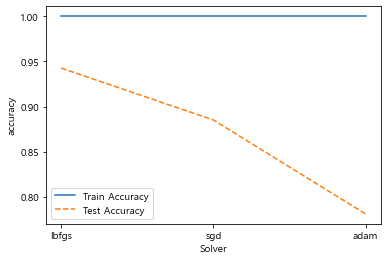

In [23]:
# 정확도 그래프 표현
plt.plot(para_solver, train_accuracy, linestyle='-', label = 'Train Accuracy')
plt.plot(para_solver, test_accuracy, linestyle='--', label = 'Test Accuracy')
plt.ylabel('accuracy') ; plt.xlabel('Solver')
plt.legend()

In [24]:
# Solver 지정(임의)
solver = 'adam'

In [25]:
# train 및 test 정확도 결과 저장용
train_accuracy = []; test_accuracy = []
# Mini Batch 변경 :
para_batch = [20 * batch for batch in range(1,10)]

for v_batch in para_batch:
    nn = MLPClassifier(batch_size = v_batch, solver = "adam", activation = "relu",
                      hidden_layer_sizes = (80,80), random_state = 1234)
    nn.fit(df_scaled_train_x, df_train_y)
    train_accuracy.append(nn.score(df_scaled_train_x, df_train_y))
    test_accuracy.append(nn.score(df_scaled_test_x, df_test_y))
    
# 데이터 테이블로 저장
df_accuracy_batch = pd.DataFrame()
df_accuracy_batch["Mini Batch"] = para_batch
df_accuracy_batch["TrainAccuracy"] = train_accuracy
df_accuracy_batch["TestAccuracy"] = test_accuracy

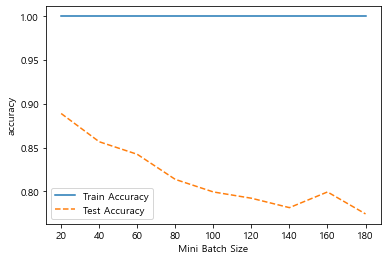

In [26]:
# Mini Batch Size별 정확도 테이블
df_accuracy_batch.round(3)

# 정확도 그래프 표현
plt.plot(para_batch, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_batch, test_accuracy, linestyle = "--", label ="Test Accuracy")
plt.ylabel("accuracy"); plt.xlabel("Mini Batch Size")
plt.legend()

In [38]:
# 최종 모델
nn_final = MLPClassifier(hidden_layer_sizes = (110,110), activation = "relu", solver = "adam",
                        batch_size =10, random_state = 1234)
nn_final.fit(df_scaled_train_x, df_train_y)
y_pred = nn_final.predict(df_scaled_test_x)

# train 데이터 셋 정확도
print("Accuracy on training set: {:.3f}".format(nn_final.score(df_scaled_train_x, df_train_y)))

# test 데이터 셋 정확도
print("Accuracy on test set: {:.3f}\n".format(nn_final.score(df_scaled_test_x, df_test_y)))

# confusion matrix
print("Confusion matrix: \n{}". format(confusion_matrix(df_test_y,y_pred)))

# 목표변수의 빈도 불균형 : f1 score로 모델 평가
print(classification_report(df_test_y, y_pred, digits = 3))

Accuracy on training set: 1.000
Accuracy on test set: 0.939

Confusion matrix: 
[[ 37   7]
 [ 10 225]]
              precision    recall  f1-score   support

           0      0.787     0.841     0.813        44
           1      0.970     0.957     0.964       235

    accuracy                          0.939       279
   macro avg      0.879     0.899     0.888       279
weighted avg      0.941     0.939     0.940       279

